研究不同可能的重叠模式

## 计算数据
将不同原子轨道之间的重叠计算出来，然后导出成cub文件，使用chemcraft查看

In [4]:
import sys
sys.path.append('D:\code\pywfn')
from pywfn.maths import cubeGrid
from pywfn.maths import flib
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [12]:
lmnDict={
    'S':[0,0,0],
    'PX': [1,0,0],
    'PY': [0,1,0],
    'PZ': [0,0,1],
    'XX': [2,0,0],
    'YY': [0,2,0],
    'ZZ': [0,0,2],
    'XY': [1,1,0],
    'XZ': [1,0,1],
    'YZ': [0,1,1],
}

In [54]:
s=4
p0=np.array([-2*s,-s,-s],dtype=float)
p1=np.array([ 2*s, s, s],dtype=float)
coords=np.array([
    [ 1,0,0],
    [-1,0,0]
],dtype=float)
shape,grids=cubeGrid(p0,p1,0.1,0)
ngrid=grids.shape[0]
coords[0]

array([1., 0., 0.])

In [55]:
def calc_atoWfn(ato:str,coord:np.ndarray):
    alp=1.0
    l,m,n=lmnDict[ato]
    if ato=='':return np.zeros(ngrid)
    wfn=flib.gtf(alp,ngrid,grids,coord,l,m,n)
    return wfn

def calc_molWfn(atos:list[str]):
    ato1,ato2=atos
    wfn=calc_atoWfn(ato1,coords[0])+calc_atoWfn(ato2,coords[1])
    return wfn/2

vals=[]
for keyi in lmnDict.keys():
    for keyj in lmnDict.keys():
        wfn=calc_molWfn([keyi,keyj])
        vals.append(wfn)

In [51]:
index=0
for keyi in lmnDict.keys():
    for keyj in lmnDict.keys():
        print(f'{index+1:>3}:{keyi:>2}-{keyj:>2}  |  ',end='')
        
        index+=1
        if(index%10==0):print()

  1: S- S  |    2: S-PX  |    3: S-PY  |    4: S-PZ  |    5: S-XX  |    6: S-YY  |    7: S-ZZ  |    8: S-XY  |    9: S-XZ  |   10: S-YZ  |  
 11:PX- S  |   12:PX-PX  |   13:PX-PY  |   14:PX-PZ  |   15:PX-XX  |   16:PX-YY  |   17:PX-ZZ  |   18:PX-XY  |   19:PX-XZ  |   20:PX-YZ  |  
 21:PY- S  |   22:PY-PX  |   23:PY-PY  |   24:PY-PZ  |   25:PY-XX  |   26:PY-YY  |   27:PY-ZZ  |   28:PY-XY  |   29:PY-XZ  |   30:PY-YZ  |  
 31:PZ- S  |   32:PZ-PX  |   33:PZ-PY  |   34:PZ-PZ  |   35:PZ-XX  |   36:PZ-YY  |   37:PZ-ZZ  |   38:PZ-XY  |   39:PZ-XZ  |   40:PZ-YZ  |  
 41:XX- S  |   42:XX-PX  |   43:XX-PY  |   44:XX-PZ  |   45:XX-XX  |   46:XX-YY  |   47:XX-ZZ  |   48:XX-XY  |   49:XX-XZ  |   50:XX-YZ  |  
 51:YY- S  |   52:YY-PX  |   53:YY-PY  |   54:YY-PZ  |   55:YY-XX  |   56:YY-YY  |   57:YY-ZZ  |   58:YY-XY  |   59:YY-XZ  |   60:YY-YZ  |  
 61:ZZ- S  |   62:ZZ-PX  |   63:ZZ-PY  |   64:ZZ-PZ  |   65:ZZ-XX  |   66:ZZ-YY  |   67:ZZ-ZZ  |   68:ZZ-XY  |   69:ZZ-XZ  |   70:ZZ-YZ  |  
 71:XY- S  | 

In [56]:
x0,y0,z0=p0
natm=2
Nx,Ny,Nz=shape
step=0.1

file=open('testCubData.cub','w')
file.write(f'genetrate by pywfn\ntitle1 {ngrid*len(vals)}\n')
file.write(f'{-natm:>5}{x0:>12.6f}{y0:>12.6f}{z0:>12.6f}\n')
file.write(f'{Nx:>5}{step:>12.6f}{0:>12.6f}{0:>12.6f}\n')
file.write(f'{Ny:>5}{0:>12.6f}{step:>12.6f}{0:>12.6f}\n')
file.write(f'{Nz:>5}{0:>12.6f}{0:>12.6f}{step:>12.6f}\n')
# 记录坐标
file.write(f'{1:>5}{1:12.6f}{ 1:12.6f}{0:12.6f}{0:12.6f}\n')
file.write(f'{1:>5}{1:12.6f}{-1:12.6f}{0:12.6f}{0:12.6f}\n')

obtInfo=[len(vals)]+[i+1 for i in range(len(vals))]
for i,info in enumerate(obtInfo): # 写入轨道信息
    file.write(f'{info:>5}')
    if(i+1)%10==0:file.write('\n')
if(i+1)%10!=0:file.write('\n')
index=0
for i in range(ngrid): # 对每一个点进行循环
    for j in range(len(vals)): # 对每一个轨道进行循环
        v=vals[j][i]
        # if v==0:v=1e-8
        file.write(f'{v:13.5E}')
        index+=1
        if index==Nz*len(vals):
            file.write('\n')
            index=0
            continue
        if index%6==0:file.write('\n')
file.close()

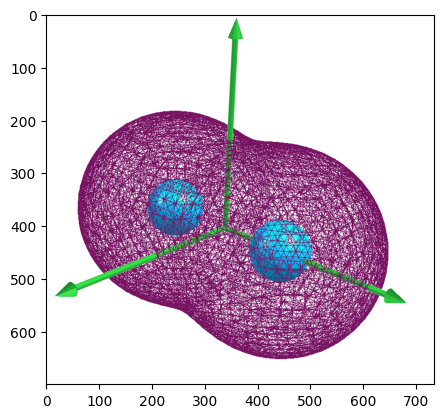

In [11]:
img=Image.open('轨道重叠图像/img_001.png')
img=np.array(img)

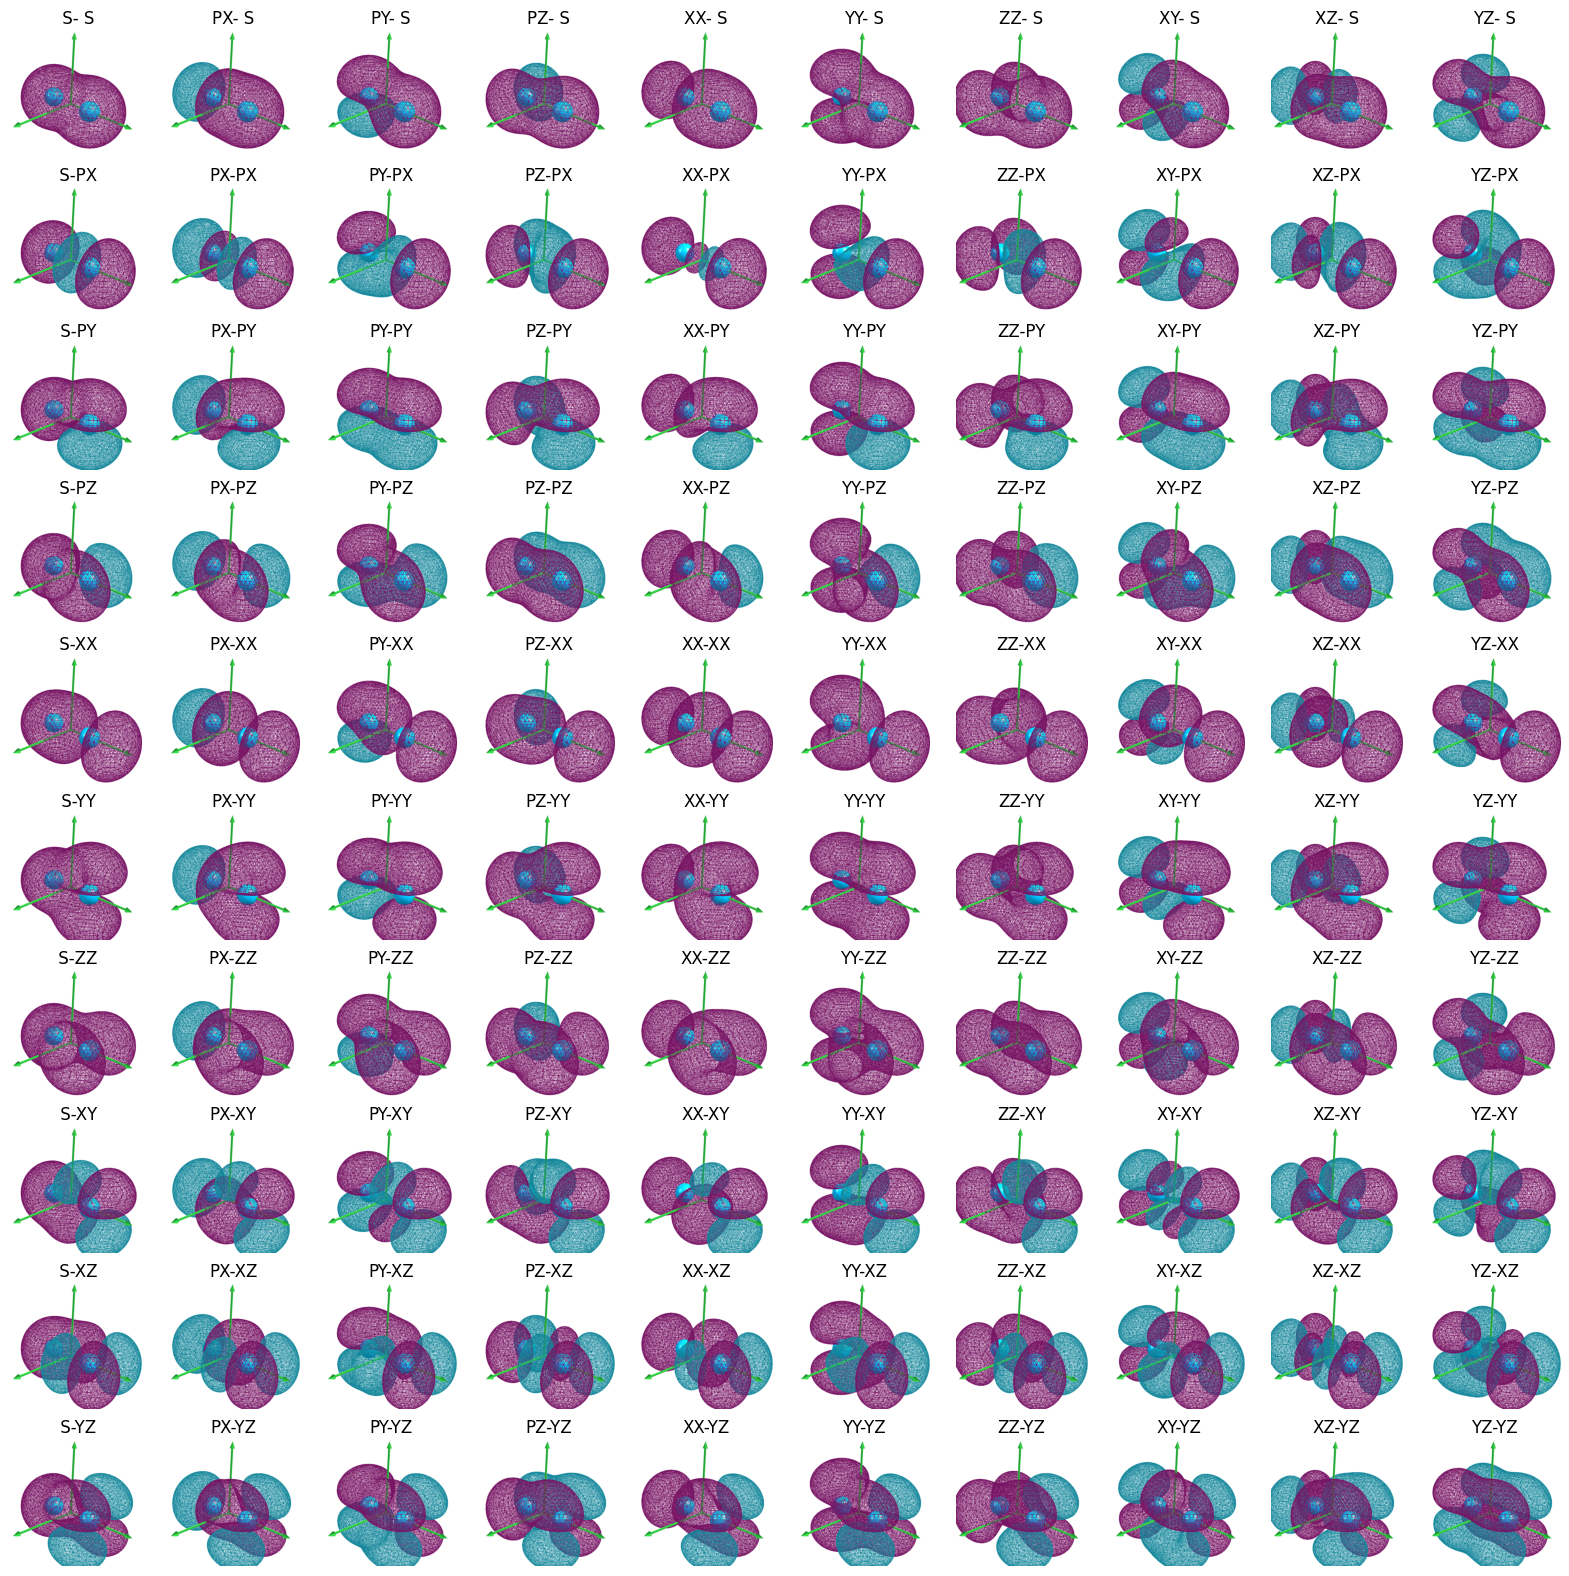

In [26]:
fig,axs=plt.subplots(10,10,figsize=(20,20))
keys=lmnDict.keys()
index=0
for i,ki in enumerate(keys):
    for j,kj in enumerate(keys):
        img=Image.open(f'轨道重叠图像/img_{index+1:0>3}.png')
        img=np.array(img)
        axs[i,j].imshow(img)
        axs[i,j].axis('off')
        axs[i,j].set_title(f'{kj:>2}-{ki:>2}')
        index+=1
plt.savefig('轨道重叠.png',dpi=300,bbox_inches='tight')

In [18]:
axs[0,0].imshow(img)